# Negative Comments Classification

## Importing Data

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn

In [4]:
tweets = pd.read_csv("/Volumes/GoogleDrive/Shared drives/Unidad Compartida Pachitos/Data Science Projects Pachitos/HackOff-CompanySentiments/archive (2)/Tweets.csv")

In [5]:
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
tweets.drop(['tweet_id','airline_sentiment_confidence','negativereason','negativereason_confidence','airline_sentiment_gold','name','negativereason_gold','retweet_count',
'tweet_coord','tweet_created','tweet_location','user_timezone','airline'], axis = 1, inplace = True)

In [7]:
tweets = tweets.rename(columns = {'airline_sentiment':'flag'})

In [8]:
tweets['flag'] = tweets['flag'].map({'neutral':0,'negative':1,'positive':0})

In [9]:
tweets

,flag,text
0,0,@VirginAmerica What @dhepburn said.
1,0,@VirginAmerica plus you've added commercials t...
2,0,@VirginAmerica I didn't today... Must mean I n...
3,1,@VirginAmerica it's really aggressive to blast...
4,1,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,0,@AmericanAir thank you we got on a different f...
14636,1,@AmericanAir leaving over 20 minutes Late Flig...
14637,0,@AmericanAir Please bring American Airlines to...
14638,1,"@AmericanAir you have my money, you change my ..."


In [10]:
tweets.flag.value_counts()/len(tweets)

1    0.626913
0    0.373087
Name: flag, dtype: float64

In [11]:
neg_tweets = tweets[tweets['flag'] == 1]
neutral_tweets = tweets[tweets['flag'] == 0]

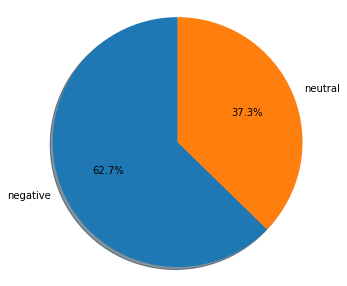

In [14]:
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# labels for the two classes
labels =  'negative','neutral'
# Sizes for each slide
sizes = [len(neg_tweets), len(neutral_tweets )] 

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Display the chart
plt.show()

In [15]:
#!pip install wordcloud
from wordcloud import WordCloud
# Preprocessing
import nltk # Python library for NLP
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generator
import re                                  # library for regular expression operations
import string                              # for string operations
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer, SnowballStemmer    # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer 
#nltk.download('stopwords')
#nltk.download('wordnet')
#classification
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import model_selection
from sklearn import feature_extraction
from collections import Counter
from nltk.util import ngrams
#nltk.download('punkt')

In [26]:
class TweetClassify():

    def __init__(self, tweets_df, column_name , stemm = False, lemm =True):
        self.tweets_ = tweets_df
        self.stemm_ = stemm
        self.lemm_ = lemm
        self.stemmer_ = SnowballStemmer('english')
        self.lemmatizer_ = lemmatizer = WordNetLemmatizer()
        self.vect_wc = feature_extraction.text.CountVectorizer(max_features = 10000, ngram_range=(1,2))
        self.vect_tfidf = feature_extraction.text.TfidfVectorizer(max_features = 10000, ngram_range=(1,2))
        self.stopwords_eng_ = nltk.corpus.stopwords.words('english')
        self.preprocess(column_name)
    def preprocess(self, column_name):
        self.tweets_['tweets_clean'] = self.tweets_[column_name].apply(lambda x: self.clean_text(x, stemm= self.stemm_, lemm = self.lemm_ ,stop_words = self.stopwords_eng_))


    def clean_text(self,observation,stemm , lemm , stop_words):
        #Clean tweets (removing punctuations and converting everything to lowercase)
        
        observation = re.sub(r'[^\$\w\s]', '', str(observation).lower().strip())
        observation = re.sub(r'^RT[\s]+', '', observation)
        observation = re.sub(r'https?:\/\/.*[\r\n]*', '', observation) # removing hyperlinks
        observation = re.sub(r'#', '', observation) #removing hash # sign


        #Tokenize (converting strings to lists)
        tokens_list = observation.split()
        tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
        tokens_list = tokenizer.tokenize(observation)
        #Remove the Stopwords
        if stop_words is not None:
            stop_text = []
            for word in tokens_list: 
                if (word not in stop_words and  # remove stopwords
        word not in string.punctuation ): # remove punctuation
                    word_ = ''
                    for char in word:
                        if (char not in string.punctuation and
                            char not in ['1','2','3','4','5','6','7','8','9','0','',' ']):
                            word_ = "".join((word_,char))
                    stop_text.append(word_)
                    tokens_list = stop_text.copy()
        if stemm == True:
            stem_text = []
            for word in tokens_list: # Go through every word in the tokens list
                # Init the Stemmer
                stem_word = self.stemmer_.stem(word)
                stem_text.append(stem_word)
            tokens_list = stem_text.copy()
        if lemm == True:
            lem_text = []
            for word in tokens_list: # Go through every word in the tokens list
                # Init the Wordnet Lemmatizer
                lem_word = self.lemmatizer_.lemmatize(word)
                lem_text.append(lem_word)
            tokens_list = lem_text.copy()
        
        tweets_clean = " ".join(tokens_list)
        return tweets_clean

    def classify_text(self, y_column ,classifier, model_name, strategy, ngrams = (1,2)):
        scores = []
        kf = KFold(n_splits = 10, random_state = 42, shuffle = True)
        accuracy_scores = []
        auc_scores = []
        cm = np.array([[0,0],[0,0]])
        X = self.tweets_['tweets_clean']
        y = self.tweets_[y_column]

        if strategy == 'wc':
            vectorizer = feature_extraction.text.CountVectorizer(max_features = 10000, ngram_range=ngrams)
        elif strategy == 'tfidf':
            vectorizer = feature_extraction.text.TfidfVectorizer(max_features = 10000, ngram_range=ngrams)

        
        for tr_i , te_i in kf.split(X):
            model_pipe = pipeline.Pipeline([('vectorize',vectorizer),
                                    ('model', classifier)])
            X_tr = X.iloc[tr_i]
            y_tr = y[tr_i].values

            X_te = X.iloc[te_i]
            y_te = y[te_i].values
            
            # Fit data
            model_pipe.fit(X_tr, y_tr)
            # Predict
            y_hat = model_pipe.predict(X_te)
            proba = model_pipe.predict_proba(X_te)[:,1]
            # Evaluate
            accuracy_scores.append(metrics.accuracy_score(y_te, y_hat))
            auc_scores.append(metrics.roc_auc_score(y_te,proba ))
            # Confusion Matrix 
            cm  += metrics.confusion_matrix(y_te, y_hat)
        print(f'Classifier: {model_name}')
        print(f'Strategy: {str(strategy)}')
        print(f'N-grams: {str(ngrams)}')
        print(f'Tweets Classified: {str(len(X))}')
        print(f'Accuracy:{round(np.average(accuracy_scores),2)}')
        print(f'AUC: {round(np.average(auc_scores),2)}')

        classes = np.unique(y_te)
        fig,ax = plt.subplots()
        sns.heatmap(cm, annot = True, fmt = 'd', ax = ax,cmap = plt.cm.Blues)
        ax.set(xlabel = 'Predicted', ylabel = 'Actual',  xticklabels = classes, yticklabels = classes, title = 'Confusion Matrix')
        plt.yticks(rotation = 0)
        plt.title(f'{model_name} Confusion Matrix ')
        plt.show()

        return None
    def get_data(self):
        X = self.tweets_['tweets_clean']
        y = self.tweets_['flag'].values
        return X,y

In [17]:
from nltk.tokenize import TweetTokenizer
tweets_processed = TweetClassify(tweets, column_name='text')

In [18]:
tweets_processed.tweets_['tweets_clean']

0                              virginamerica dhepburn said
1        virginamerica plus youve added commercial expe...
2        virginamerica didnt today must mean need take ...
3        virginamerica really aggressive blast obnoxiou...
4                       virginamerica really big bad thing
                               ...                        
14635       americanair thank got different flight chicago
14636    americanair leaving  minute late flight warnin...
14637    americanair please bring american airline blac...
14638    americanair money change flight dont answer ph...
14639    americanair  ppl need  know many seat next fli...
Name: tweets_clean, Length: 14640, dtype: object

In [19]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn import pipeline
from sklearn.model_selection import KFold
from sklearn import metrics, utils
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
# Evaluate
from sklearn import metrics
import seaborn as sns

rs = 123

In [20]:
nb_clf = naive_bayes.MultinomialNB()
lr_clf =  LogisticRegression(random_state = rs)
knn_clf = KNeighborsClassifier(3)
rf_clf = RandomForestClassifier(random_state=rs, n_jobs = -1)
gb_clf = GradientBoostingClassifier(random_state=rs)
svc_clf =  SVC(kernel="linear", C=0.025)
ada_clf = AdaBoostClassifier()

Classifier: Naive_Bayes
Strategy: wc
N-grams: (1, 2)
Tweets Classified: 14640
Accuracy:0.82
AUC: 0.9


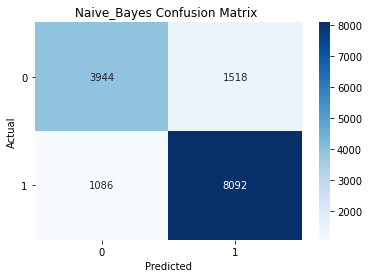

(array([0.13970259, 0.98597652, 0.03200912, ..., 0.02007335, 0.75256852,
        0.99970142]),
 Pipeline(steps=[('vectorize',
                  CountVectorizer(max_features=10000, ngram_range=(1, 2))),
                 ('model', MultinomialNB())]))

In [21]:
tweets_processed.classify_text(y_column = 'flag',classifier = nb_clf, model_name='Naive_Bayes', strategy='wc', ngrams = (1,2))

Classifier: Naive_Bayes
Strategy: wc
N-grams: (1, 3)
Tweets Classified: 14640
Accuracy:0.82
AUC: 0.9


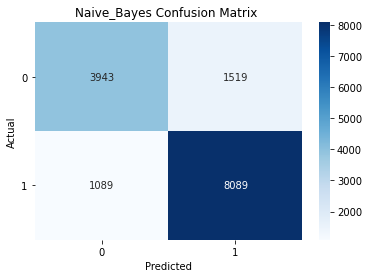

(array([0.13698687, 0.98519056, 0.0310159 , ..., 0.01975573, 0.74398662,
        0.99968751]),
 Pipeline(steps=[('vectorize',
                  CountVectorizer(max_features=10000, ngram_range=(1, 3))),
                 ('model', MultinomialNB())]))

In [23]:
tweets_processed.classify_text(y_column = 'flag',classifier = nb_clf, model_name='Naive_Bayes', strategy='wc', ngrams = (1,3))

Classifier: Naive_Bayes
Strategy: tfidf
N-grams: (1, 2)
Tweets Classified: 14640
Accuracy:0.81
AUC: 0.9


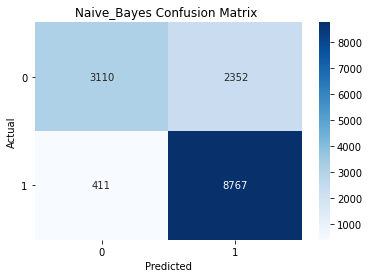

(array([0.49152804, 0.7989388 , 0.38457019, ..., 0.28200987, 0.68145906,
        0.91691718]),
 Pipeline(steps=[('vectorize',
                  TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
                 ('model', MultinomialNB())]))

In [22]:
tweets_processed.classify_text(y_column = 'flag',classifier = nb_clf, model_name='Naive_Bayes', strategy='tfidf', ngrams = (1,2))

Classifier: Naive_Bayes
Strategy: tfidf
N-grams: (1, 3)
Tweets Classified: 14640
Accuracy:0.81
AUC: 0.9


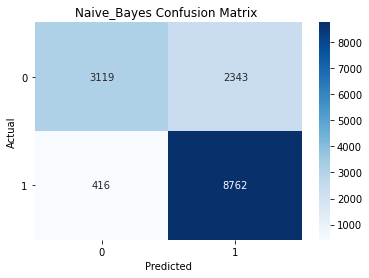

(array([0.48891715, 0.7905104 , 0.38140791, ..., 0.28195935, 0.67267171,
        0.91379183]),
 Pipeline(steps=[('vectorize',
                  TfidfVectorizer(max_features=10000, ngram_range=(1, 3))),
                 ('model', MultinomialNB())]))

In [24]:
tweets_processed.classify_text(y_column = 'flag',classifier = nb_clf, model_name='Naive_Bayes', strategy='tfidf', ngrams = (1,3))

### Logistic Regression

Classifier: Logistic_Regression
Strategy: wc
N-grams: (1, 2)
Tweets Classified: 14640
Accuracy:0.83
AUC: 0.9


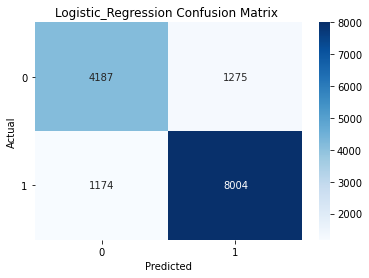

(array([0.28559642, 0.9815911 , 0.5176553 , ..., 0.1078283 , 0.72646649,
        0.99524667]),
 Pipeline(steps=[('vectorize',
                  CountVectorizer(max_features=10000, ngram_range=(1, 2))),
                 ('model', LogisticRegression(random_state=123))]))

In [27]:
tweets_processed.classify_text(y_column = 'flag',classifier = lr_clf, model_name='Logistic_Regression', strategy='wc', ngrams = (1,2))